In [1]:
import re # We clean text using regex
import csv # To read the csv
from collections import defaultdict # For accumlating values
from nltk.corpus import stopwords # To remove stopwords
from gensim import corpora # To create corpus and dictionary for the LDA model
from gensim.models import LdaModel # To use the LDA model
import pyLDAvis.gensim # To visualise LDA model effectively
import pandas as pd

In [2]:
import nltk


In [3]:
fileContents = defaultdict(list)
with open('Amz_Womens_running.csv',encoding='utf-8') as f:
    reader1 = csv.DictReader(f)
    
    for row in reader1: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            fileContents[k].append(v) # append the value
with open('Amz_Mens_running.csv',encoding='utf-8') as g:
    reader2 = csv.DictReader(g)
    
    for row in reader2: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            fileContents[k].append(v) # append the value


In [4]:
#print(fileContents)
reviews = fileContents['Review']
len(reviews)

4672

In [5]:
reviews = [re.sub(r'[^\w\s]','',str(item)) for item in reviews]

In [6]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [7]:
texts = [[word for word in document.lower().split() if word not in stopwords] for document in reviews]


In [8]:
frequency = defaultdict(int)
for text in texts:
    for token in text:
         frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

In [9]:
dictionary = corpora.Dictionary(texts)

In [10]:
print(dictionary)

Dictionary(2091 unique tokens: ['get', 'hard', 'narrow', '9', 'fit']...)


In [11]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1)],
 [(6, 1), (11, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(0, 1),
  (11, 1),
  (12, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(10, 2),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1)],
 [(6, 1), (11, 1), (34, 1)],
 [(35, 1), (36, 1), (37, 1), (38, 1), (39, 1)],
 [(6, 1), (8, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(4, 1),
  (9, 1),
  (11, 1),
  (30, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(6, 1),
  (9, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(4, 1),
  (8, 1),
  (9, 2),
  (42, 3),
  (44, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1)],
 [(74, 1)],
 [(2, 2

In [12]:
NUM_TOPICS = 5 # This is an assumption. 
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, random_state=100,update_every=1,passes=100,chunksize=400,per_word_topics=True,alpha=0.01,eta=0.91)#This might take some time.

In [13]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)

(0, '0.033*"shoes" + 0.024*"like" + 0.023*"feet" + 0.023*"shoe" + 0.022*"running" + 0.020*"comfortable" + 0.018*"walking" + 0.015*"great" + 0.015*"day" + 0.015*"wear"')
(1, '0.061*"great" + 0.049*"fit" + 0.039*"shoes" + 0.038*"good" + 0.037*"comfortable" + 0.022*"shoe" + 0.021*"nice" + 0.016*"fits" + 0.016*"price" + 0.016*"well"')
(2, '0.075*"comfortable" + 0.067*"love" + 0.062*"shoes" + 0.029*"super" + 0.024*"comfy" + 0.022*"pair" + 0.022*"light" + 0.017*"great" + 0.016*"fit" + 0.013*"shoe"')
(3, '0.026*"shoes" + 0.020*"shoe" + 0.011*"pair" + 0.009*"black" + 0.009*"like" + 0.008*"back" + 0.008*"one" + 0.007*"get" + 0.007*"box" + 0.007*"foot"')
(4, '0.075*"size" + 0.019*"wear" + 0.018*"fit" + 0.018*"big" + 0.016*"shoes" + 0.015*"comfortable" + 0.015*"ordered" + 0.014*"half" + 0.013*"little" + 0.013*"shoe"')


In [14]:
word_dict = {};
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 15)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,shoes,great,comfortable,shoes,size
1,like,fit,love,shoe,wear
2,feet,shoes,shoes,pair,fit
3,shoe,good,super,black,big
4,running,comfortable,comfy,like,shoes
5,comfortable,shoe,pair,back,comfortable
6,walking,nice,light,one,ordered
7,great,fits,great,get,half
8,day,price,fit,box,little
9,wear,well,shoe,foot,shoe


In [15]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.363373716731674

Coherence Score:  0.5696180218197112


In [16]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False,R=10,lambda_step =0.1)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda.html')

C:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [202]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [203]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)


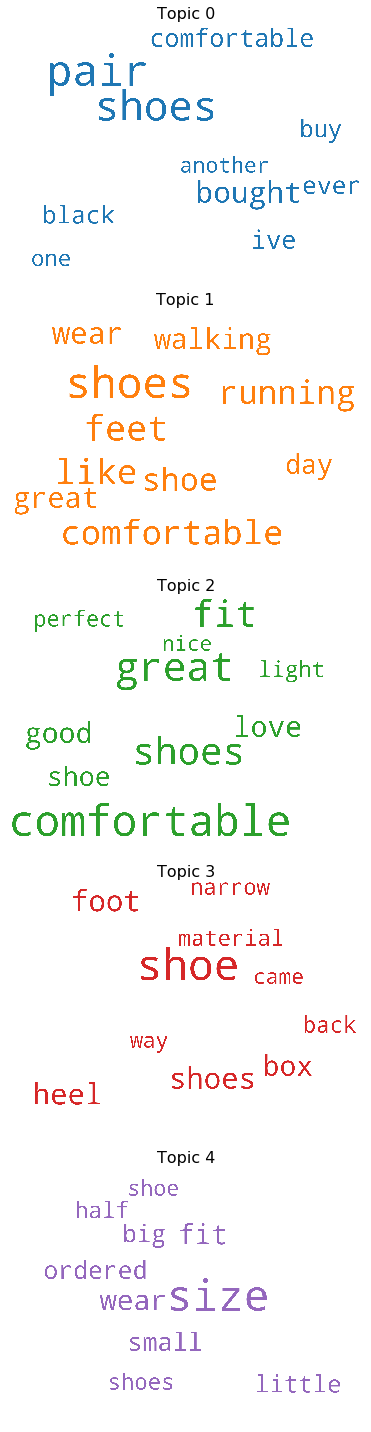

In [206]:
fig, axes = plt.subplots(5, 1, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

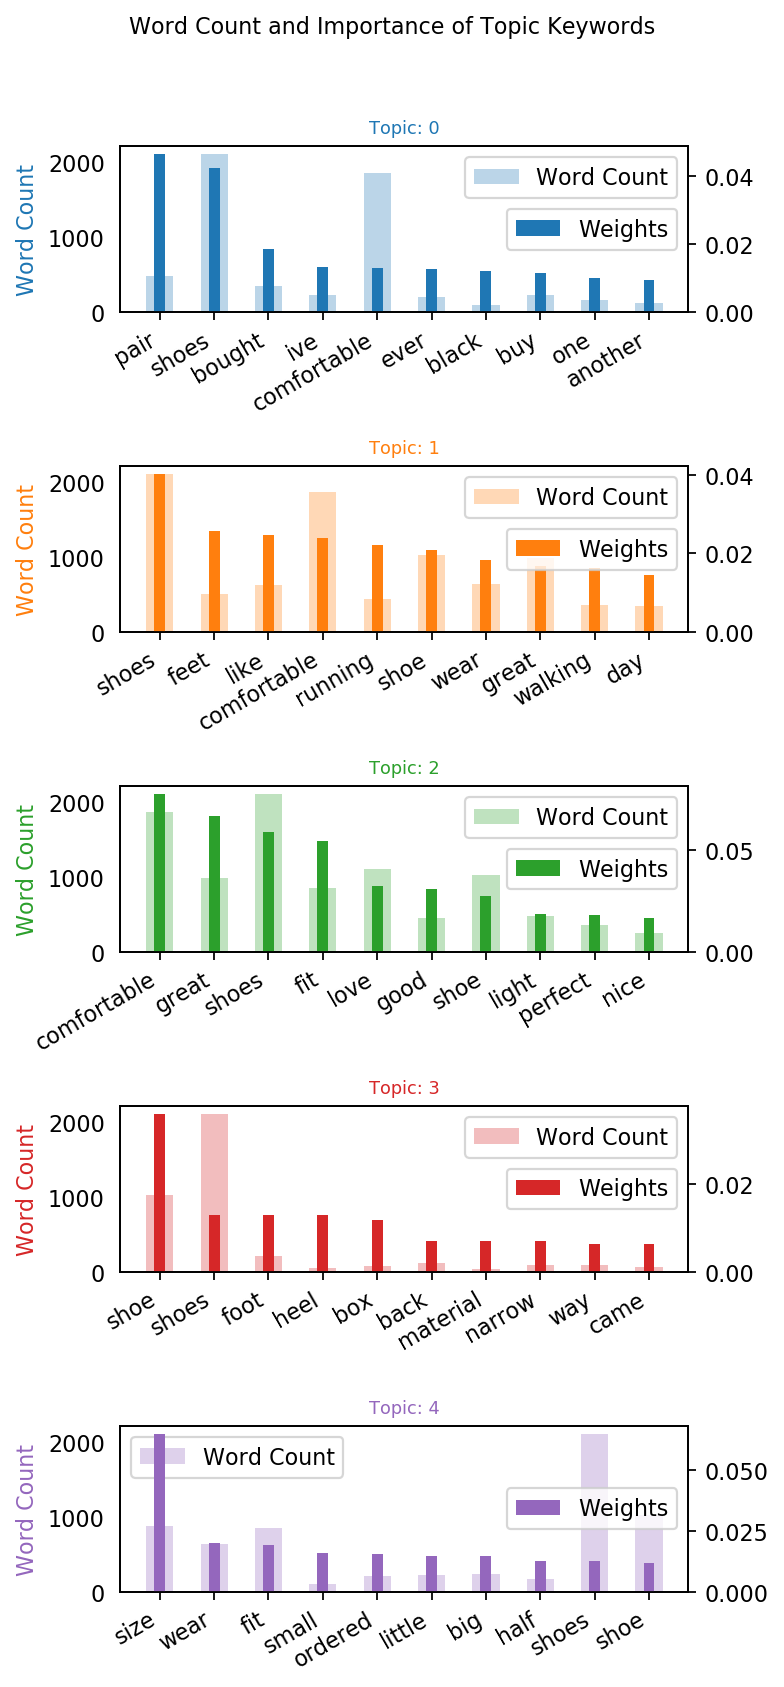

In [238]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 1, figsize=(5,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='best',frameon='None'); ax_twin.legend(loc='center right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=10, y=1.05)    
plt.show()